# The Numpy.Random Package - An Investigation
In this notebook we will be investigating the Numpy.random package and it's various features.  Numpy.random is a random sampling mechanism within the greater Numpy package.

## What is NumPy?

NumPy is the fundamental package for scientific computing with Python.  It is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.


## Random Data
In statistics, a simple random sample is a subset of individuals (a sample) chosen from a larger set (a population).  A random sample ought to be completely unbiased, although this is very difficult to achieve in reality.  It is assumed that if a random sample is truely random, then any individual has the same probability of being chosen as any other individual or, by extension, any subset of individuals has the same probability of being chosen as any other subset. 

## Numpy.Random
An important part of any simulation is the ability to generate random numbers. For this purpose, NumPy provides various routines in the submodule random. It uses a particular algorithm, called the Mersenne Twister, to generate pseudorandom numbers.  We call them pseudorandom because, as noted above, it is almost impossible to remove all bias from selection,both in computing and everyday life.

### There are four sections to Numpy.random
1. Simple Random Data
2. Permutations
3. Distributions
4. Random Generators

We will look at these in turn.



In [2]:
import numpy as np # to import the numpy package
import matplotlib.pyplot as plt # to import matplotlib for graphing results

### 1.Simple Random Data
This is numpy.random operating at it's most basic level.  It has a number of functions to generate simple random data and we can take a look at two of these.

#### 1.1 rand(d0, d1, …, dn)
This generates an array of random values greater than and equal to zero and less than one in a given shape.  The number of values is determinded by the shape of the array.  For example, a two dimensional array with 3 rows and 4 columns will look like the output below, giving twelve values.

In [3]:
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html#numpy.random.rand

x = np.random.rand(3,4)
x

array([[ 0.3601054 ,  0.11421828,  0.63478241,  0.94496343],
       [ 0.93200538,  0.68178163,  0.69886026,  0.86535683],
       [ 0.34505569,  0.40363761,  0.23866926,  0.37550905]])

We can add a third dimension to the array by adding another variable to the function.  For example, below, adding 2 to give a three dimensional selection, two arrays of three rows and four columns.

In [63]:
y = np.random.rand(2,3,4)
y

array([[[ 0.38704903,  0.62820545,  0.90361549,  0.02060292],
        [ 0.91471138,  0.77716123,  0.69487716,  0.11422972],
        [ 0.1866291 ,  0.02365794,  0.65799297,  0.76409647]],

       [[ 0.55002798,  0.28457007,  0.88610946,  0.24234917],
        [ 0.25508778,  0.69691586,  0.04227759,  0.55284612],
        [ 0.6731243 ,  0.52502286,  0.22240267,  0.10235505]]])

#### 1.2 randint(low, high=None, size=None, dtype='l')

This returns random integers from low (inclusive) to high (exclusive).  This allows for setting the parameters of the array outside of zero to one as with rand, above.  The example below generatesfiftenn integers greater than and equal to zero and less than twenty.

In [62]:
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint

z = np.random.randint(1,20, size=15)
z

array([ 6, 13, 13, 14, 10, 11, 15,  4, 19, 10, 17, 12, 13, 13,  6])

### 2. Permutations

#### 2.1 permutation(x)

This modifies a sequence in-place by shuffling the contents of an array into different permutations.  The actual contents remain the same but the order is shuffled.  In the example below the array of 20 integers is shuffled but the same integers remain in the array.


In [6]:
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.permutation.html#numpy.random.permutation

arr = np.random.permutation(20)
arr

array([ 8, 15, 18, 10,  6,  3,  0, 17, 12, 13, 16,  2,  9,  1,  7, 19, 11,
        5,  4, 14])

### 3. Distributions

A probability distribution tells you what the probability of an event happening is. Probability distributions can show simple events, like tossing a coin or picking a card. They can also show much more complex events, like the probability of a certain drug successfully treating cancer. The sum of all the probabilities in a probability distribution is always 100% (or 1 as a decimal).

We will look at five of the most widely used probability distributions in this section.


#### 3.1 binomial(n, p, size=None)
This draws samples from a binomial distribution with specified parameters where n is the number (always >=0) of trials and p is the probability ([0,1]). Size is the number of tests.  In the example below we take the example of the ball landing on red on a roulette table.  This would have equal probability of landing on red as black, so p will be equal to 0.5.  We will have twenty trials so n will be equal to 20.  We will run the test one hundred times times so Size will be equal to 100.

[13  4  6 14 12 10  7 15 13  9  9 10  9 10  5  9 10 12 10 14 11 10 11 13 12
 11 13  5 13 11  7 12 10 12 12 10 10  9  8  9  9  8 10  8 10 10 10 14 14 11
 10 13  9 10 13  8 11  7 11 14 11  8  9  7 10  7  8 12 11 11 16 14 10 16  9
 15 13 14  9 10 11 13 12  7 11  9 11 15 10  9 11 11 10 10  7  8 12 11 11 13]


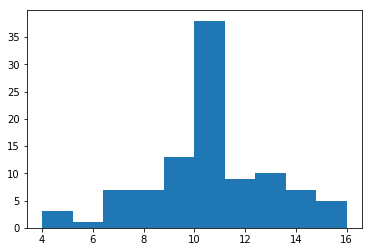

In [61]:
# https://en.wikipedia.org/wiki/Binomial_distribution
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.binomial.html#numpy.random.binomial

bi = np.random.binomial(20, 0.5, size=100)
print (bi)
plt.hist(bi)
plt.show()


The above data shows the number of times out of 20 the roulette ball landed on red for one hundred tests.  As expected most of the results cluster around ten with little or no results at the lower or upper end of the 1-20 spectrum.

#### 3.2 hypergeometric(ngood, nbad, nsample, size=None)

Hypergeometric distribution is similar to the Binomial distribution above but different in one crucial way.  In binomial distributions the probability remains the same regardless of how many trials.  In the roulette example, each time the ball is rolled there is the same number of red and black squares to land on.  This is because once a trial is finished the sample is deemed to have been replaced and we start again at the begining.  With Hypergeometric distributions there is no replacement.

As an example to illustrate this, let us say that there is a box of 100 bananas, of which ninety five are ripe and five are bad.  If we were to pick twenty bananas out of the box without looking, how many of the twenty bananas would be ripe? Note that, as there is no replacement, as each banana is taken there is now one less banana to choose from.  We will run the test one hundred times.


[18 19 19 19 20 19 19 19 20 19 18 19 19 19 20 20 19 20 19 18 18 19 20 20 19
 19 18 18 20 20 20 19 20 20 19 19 19 19 19 19 18 20 19 18 19 20 20 19 20 19
 20 18 19 19 19 19 19 18 20 19 18 17 18 20 18 20 19 18 20 19 18 18 19 20 18
 18 18 20 19 20 19 18 17 18 19 19 20 19 20 19 19 20 19 19 19 20 19 20 18 19]


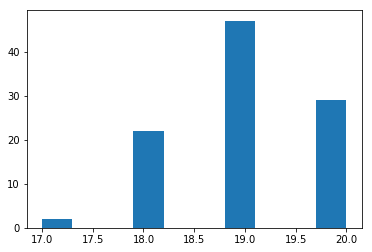

In [60]:
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.hypergeometric.html#numpy.random.hypergeometric
# https://stattrek.com/probability-distributions/hypergeometric.aspx

hy = np.random.hypergeometric(95,5,20, 100)
print(hy)
plt.hist(hy)
plt.show()

The above data shows the number of ripe bananas that would have been pulled out of twenty for one hundred tests. As expected because there are 95% ripe bananas in the box, the results clustered in the upper teens to twenty inclusive.

#### 3.3 normal (loc=0.0, scale=1.0, size=None)

This generates sample data to match a given mean and standard deviation.  The mean is the average value of an array and the standard deviation is is a measure that is used to quantify the amount of variation or dispersion of a set of data values.  In brief, a low satndard deviation would indicate that most values cluster around the mean while a higher standard deviation would suggest values being more spread out.  An approximate rule for standard deviations is 68% of values falling one deviation either side of the mean, 95% falling in the fist and second deviations either side of the mean, and up to 99.7% falling three deviations from the mean.

For example, if we were to look at a set of 10,000 exam results.  The average score being 75 with a standard deviation from the mean of 10. Using the above rule, this would mean that 68% of results would fall between 65 and 85, 95% of results will fall between 55 and 95, and 99.7% of results falling between 45 and 105. We can produce the data using the normal function.


[ 72.71425768  90.49867203  70.36411389 ...,  94.79099992  71.2698328
  68.83640035]


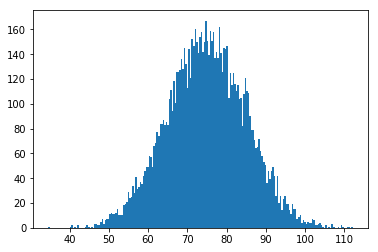

In [59]:
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html#numpy.random.normal
# https://en.wikipedia.org/wiki/Standard_deviation

z = np.random.normal(75, 10, 10000)
print (z)
plt.hist(z, bins=200)
plt.show()

#### 3.4 uniform(low=0.0, high=1.0, size=None)

This generates random data between a maximum and a minimum parameter. The data is greater than and equal to the minimum parameter and less than the maximum value with all values between having equal proability of being generated. This is also known as a Rectangular distribution.

In the example below sets the minimum value at five and the maximum at ten and draws one hundred values.

[ 9.37328698  5.19232184  8.56589401  9.19133875  6.9365292   9.90252551
  6.06145523  9.81697318  8.58788408  6.09380284  8.13832758  8.1078333
  9.9726216   5.64914504  9.86498146  5.95803666  5.17295032  8.2629905
  6.02482364  9.45656623  6.00283372  6.86858926  9.4479694   5.71959538
  6.49889178  9.5911451   6.42164108  5.94117416  5.84793309  5.0027261
  9.23784455  6.77419538  5.65906146  9.1205804   7.64184562  6.69867117
  9.26975809  9.6818117   5.73854029  8.91562944  6.76747541  9.42218621
  9.36860706  6.73640709  7.03539879  9.36163645  5.89259688  8.6578695
  6.04031684  7.65755156  8.86828078  5.4589535   5.86932002  6.20237929
  9.74608924  5.86604121  6.13673765  8.21511347  6.47702396  5.92532277
  7.5613858   5.78991517  8.38086035  8.76277941  9.87787763  7.40675984
  6.14234085  5.19545174  6.37306371  8.48581902  7.34310449  9.45776187
  6.20128409  9.7662179   7.8469768   9.27454627  8.22033455  7.57571914
  8.16791681  7.50546566  9.69784562  5.47144154  9.985

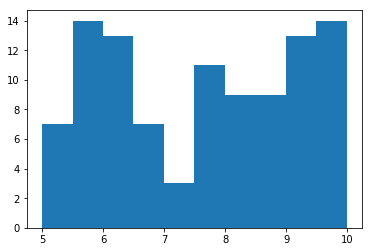

In [58]:
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.uniform.html#numpy.random.uniform
# http://mathworld.wolfram.com/UniformDistribution.html

u = np.random.uniform(5,10,100)
print(u)
plt.hist(u)
plt.show()

#### 3.5 triangular(left, mode, right, size=None)

This is a continuous probability distribution which is used when we can not only estimate a maximum and minimum values but can also estimate a most likely outcome, known as the peak. Random values are generated based on these estimates. This differs from other distributions in that the parameters directly define the shape of the output. 

In the example below we set the minimum at zero, the maximum at one hundred and the most likely, or peak, at ten.  We generate one hundred thousand values.


[ 83.30318852  23.91517543   6.86563492 ...,  60.76547388  13.07538389
  29.37606977]


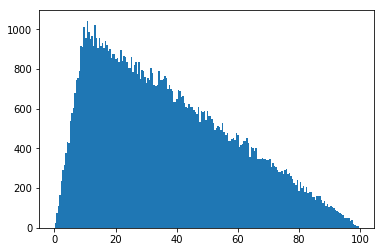

In [43]:
# https://learnandteachstatistics.files.wordpress.com/2013/07/notes-on-triangle-distributions.pdf
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.triangular.html#numpy.random.triangular
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.histogram.html

t = np.random.triangular(0, 10, 100, 100000)
print(t)
plt.hist(t, bins=200)
plt.show()

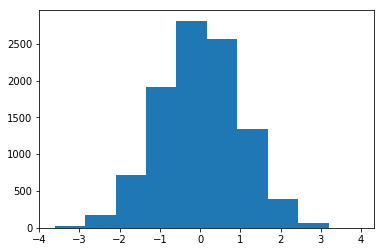

### 4. Random Generators